In [176]:
from urllib import request 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# First file

In [337]:
#open the first file
file1 = '/Users/Sheremet/Desktop/Alexandra Sheremet/Data Science/projet_2/projet/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv'
pd.read_csv(file1).head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Here, we show information about the data in the first file

In [351]:
#checking information 
data1 = pd.read_csv(file1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


You can see that, we have 4 columns. 3 first columns do not have emty elements and the last column is fully empty.
So, we remove the last column from the table.

In [352]:
#remane of one column to be coherent with another DataFrames
data1.rename(columns = {'CountryCode':'Country Code', 'SeriesCode':'Series Code'}, inplace = True)

In [353]:
data1 = data1.drop('Unnamed: 3', axis = 1)

Below, we check dublicates

In [354]:
#Checking dublons in data type
#data1.loc[data1[['Country Code', 'Series Code', 'DESCRIPTION']].duplicated(keep=False),:]
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
608    False
609    False
610    False
611    False
612    False
Length: 613, dtype: bool

In [355]:
#Checking missing elements
#print(data1.isnull().sum())
data1[data1.duplicated()]

,Country Code,Series Code,DESCRIPTION


Below, we count number of repetitions of each contry

In [356]:
data1['Country Code'].value_counts()

GEO    18
MDA    18
TZA    12
MAR    12
SRB    12
       ..
CMR     2
DZA     2
QAT     2
BFA     2
MCO     2
Name: Country Code, Length: 211, dtype: int64

In [581]:
country_info = data1['Country Code'].value_counts()

<AxesSubplot:>

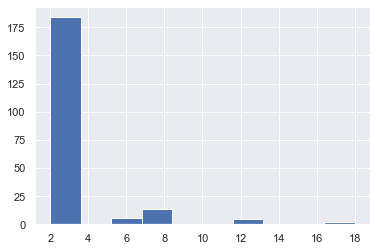

In [187]:
country_info.hist()

In [152]:
data1['Country Code']
country_code = []
for i in range(len(data1['Country Code'])):
    if data1['Country Code'][i] not in country_code:
        country_code.append(data1['Country Code'][i])
        
len(country_code)
#print(country_code)

duplicate_number = []
for code in country_code:
    num = 0
    for i in range(len(data1['Country Code'])):
        if  data1['Country Code'][i] == code:
            num = num + 1
    duplicate_number.append(num)
    
#print(duplicate_number)
df1 = pd.DataFrame(country_code, columns = ['Country_Code'])
df2 = pd.DataFrame(duplicate_number, columns = ['Number'])

country_info =  pd.concat([df1,df2], axis = 1)

In [358]:
data1['Series Code'].value_counts()

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.CD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.1564.TO         4
Name: Series Code, dtype: int64

<AxesSubplot:>

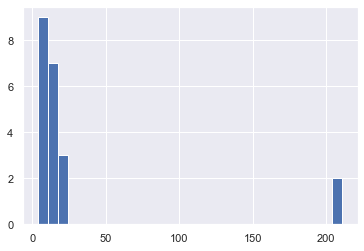

In [359]:
data1['Series Code'].value_counts().hist(bins=30)

In [617]:
pd.set_option('display.max_rows', None)
data1['DESCRIPTION'].value_counts()

#############
#How to combine such elements as two firsts??
#############

Data sources : United Nations World Population Prospects                                                                                                                                                                                                                                  154
Data sources: United Nations World Population Prospects                                                                                                                                                                                                                                   137
Estimates are based on regression.                                                                                                                                                                                                                                                         84
Data sources : Eurostat                                                                                                                       

# Second file

In [618]:
file2 = '/Users/Sheremet/Desktop/Alexandra Sheremet/Data Science/projet_2/projet/Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv'
pd.read_csv(file2).head()
#data2.info()
#pd.read_csv(file2)|

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [619]:
data2 = pd.read_csv(file2)
data2.info()
#data2.loc[data2[['Country Code','2-alpha code', 'Currency Unit','Region']].duplicated(keep=False),:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [620]:
#removing the last empty column
data2 = data2.drop('Unnamed: 31', axis = 1)

In [621]:
#Checking dublons in data type
data2.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [392]:
#modification of colums with non-correct values of years 
data2_mody = data2.copy()
for i in ["Latest population census", "Latest agricultural census",  "Latest water withdrawal data"]:
    data2_mody[i][data2_mody[i].notnull()] = data2_mody[i][data2_mody[i].notnull()].apply(lambda s: s[:4])

<ipython-input-392-677071c6078d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_mody[i][data2_mody[i].notnull()] = data2_mody[i][data2_mody[i].notnull()].apply(lambda s: s[:4])


In [625]:
data2_mody['National accounts base year'].value_counts()

2005                                                                                                                       34
Original chained constant price data are rescaled.                                                                         28
2000                                                                                                                       25
2006                                                                                                                       19
1990                                                                                                                       11
2007                                                                                                                        9
2004                                                                                                                        8
2010                                                                                                                  

In [373]:
data2_mody['National accounts base year']

0      2000
1      2002
2      2002
3      Orig
4      1990
       ... 
236    2008
237    2007
238    2005
239    1994
240    2009
Name: National accounts base year, Length: 241, dtype: object

In [393]:
#checking if any country is repeated
data2_mody['Country Code'].value_counts()

LBY    1
SOM    1
USA    1
BLZ    1
AUS    1
      ..
MDA    1
SVK    1
ZMB    1
NLD    1
MCO    1
Name: Country Code, Length: 241, dtype: int64

In [394]:
data2_mody['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

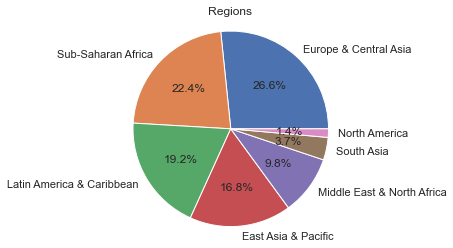

In [402]:
my_data = data2_mody['Region'].value_counts().tolist()
my_labels = data2_mody['Region'].value_counts().index.tolist()
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Regions')
plt.axis('equal')
plt.show()

In [395]:
data2_mody['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

<AxesSubplot:>

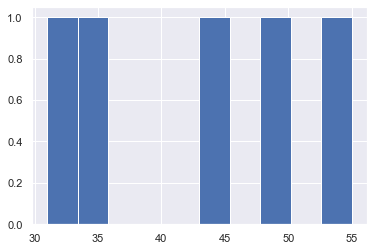

In [461]:
data2_mody['Income Group'].value_counts().hist(bins=10)

In [368]:
data2_mody['IMF data dissemination standard'].value_counts()

General Data Dissemination System (GDDS)      110
Special Data Dissemination Standard (SDDS)     71
Name: IMF data dissemination standard, dtype: int64

# Third file

In [586]:
file3 = '/Users/Sheremet/Desktop/Alexandra Sheremet/Data Science/projet_2/projet/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv'
pd.read_csv(file3).head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [534]:
data3 = pd.read_csv(file3)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [627]:
#removing of raws with all NaN elements
data3_mody = data3.dropna(thresh = 30)

In [628]:
data3_mody.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the website, we know that names of columns correspond to years. So, we can remove all years > 2022

In [629]:
#removing the last column
for i in ['2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080',
                   '2085','2090','2095','2100','Unnamed: 69']:
    data3_mody = data3_mody.drop(i, axis = 1)

In [630]:
data3_mody.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60264 entries, 4 to 886613
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    60264 non-null  object 
 1   Country Code    60264 non-null  object 
 2   Indicator Name  60264 non-null  object 
 3   Indicator Code  60264 non-null  object 
 4   1970            17665 non-null  float64
 5   1971            27679 non-null  float64
 6   1972            28184 non-null  float64
 7   1973            28768 non-null  float64
 8   1974            28757 non-null  float64
 9   1975            28545 non-null  float64
 10  1976            29392 non-null  float64
 11  1977            29728 non-null  float64
 12  1978            29917 non-null  float64
 13  1979            29559 non-null  float64
 14  1980            29780 non-null  float64
 15  1981            30742 non-null  float64
 16  1982            30805 non-null  float64
 17  1983            30814 non-null

In [631]:
data3_mody['Country Code'].value_counts()

TGO    498
SYR    479
NER    478
MLT    475
MAR    469
BDI    461
CYP    459
GRC    456
SWZ    451
SLV    449
BFA    446
TUN    445
QAT    445
KWT    445
DZA    444
ARE    443
CRI    441
LSO    438
PAN    433
ITA    422
BHR    420
SEN    414
MUS    414
MWI    413
ECU    409
BWA    406
GMB    406
BGR    401
JOR    399
PRY    393
CIV    392
COL    391
KOR    390
OMN    388
NIC    386
CMR    381
NLD    379
TZA    377
MDG    376
CUB    372
HUN    372
CHE    370
BEN    370
COG    368
RWA    366
VEN    364
MEX    362
FIN    362
MOZ    351
JPN    349
NOR    347
BRN    346
ESP    345
FRA    342
DNK    340
BEL    336
IRL    335
IDN    334
POL    329
MRT    328
GHA    328
SWE    327
PER    326
NZL    322
URY    321
IRN    320
LUX    319
GBR    317
MLI    316
GIN    315
EGY    314
HKG    312
LAO    312
DJI    311
AUT    310
GTM    309
ZMB    308
TUR    306
PRT    306
GUY    305
ARG    303
CHL    300
ROU    299
USA    292
ISR    291
CPV    290
MYS    289
IND    288
AUS    287
ALB    286
CAN    282

<AxesSubplot:>

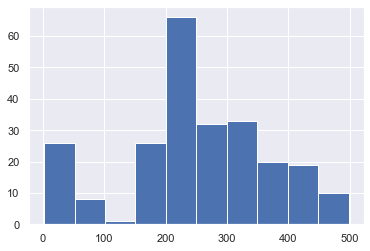

In [600]:
data3_mody['Country Code'].value_counts().hist()

In [601]:
data3_mody['Country Name'].value_counts()

Togo                        498
Syrian Arab Republic        479
Niger                       478
Malta                       475
Morocco                     469
                           ... 
Curacao                       4
Faroe Islands                 3
Kosovo                        2
St. Martin (French part)      2
Northern Mariana Islands      2
Name: Country Name, Length: 241, dtype: int64

In [613]:
data3_mody['Indicator Name'].value_counts().head(50)

Population growth (annual %)                                                                   238
Population, total                                                                              238
Population, ages 15-64 (% of total)                                                            219
Population, female (% of total)                                                                219
Population, male (% of total)                                                                  219
Population, ages 0-14 (% of total)                                                             219
Population, male                                                                               218
Population, ages 15-64, male                                                                   218
Population, ages 0-14, male                                                                    218
Population, ages 0-14, female                                                                  218
Population

<AxesSubplot:>

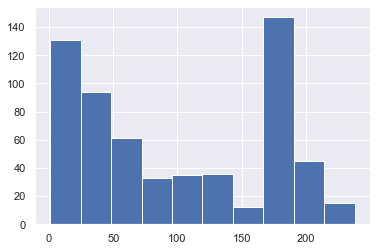

In [603]:
data3_mody['Indicator Code'].value_counts().hist()

In [604]:
data3_mody

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,86.590691,87.452583,87.526520,87.728172,87.039879,86.753387,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886251,Zimbabwe,ZWE,Theoretical duration of secondary education (y...,SE.SEC.DURS,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0,NaN,NaN
886252,Zimbabwe,ZWE,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0,NaN,NaN
886611,Zimbabwe,ZWE,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,4.600000,6.000000,5.900000,5.800000,5.800000,5.1,4.9,NaN,NaN
886612,Zimbabwe,ZWE,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.900000,7.700000,4.800000,4.700000,4.600000,4.500000,5.1,5.6,NaN,NaN


In [605]:
data3_mody.iloc[3,4:].dropna().describe()

count     45.00000
unique    45.00000
top       87.52652
freq       1.00000
Name: 7, dtype: float64

In [606]:
pd.DataFrame(data3_mody.iloc[3,4:]).dropna().astype(int).describe()

,7
count,45.000000
mean,77.755556
std,6.281848
min,65.000000
25%,74.000000
50%,78.000000
75%,83.000000
max,87.000000


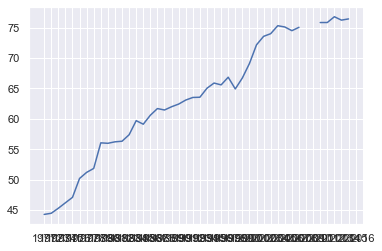

In [608]:
plt.plot(data3_mody.iloc[5,5:])

In [ ]:
print(data3.iloc[[0]])

In [463]:
data3_mody

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020


# Forth file

In [414]:
file4 = '/Users/Sheremet/Desktop/Alexandra Sheremet/Data Science/projet_2/projet/Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv'
pd.read_csv(file4).head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [415]:
data4 = pd.read_csv(file4)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [416]:
#removing the last column
data4 = data4.drop('Unnamed: 4', axis = 1)

In [419]:
#modification of column "Year"
data4_mody = data4.copy()
data4_mody["Year"] = data4_mody["Year"].apply(lambda s: s[2:])
#changing name of two first columns
data4_mody.rename(columns = {'CountryCode':'Country Code', 'SeriesCode':'Series Code'}, inplace = True)

In [420]:
data4_mody.head()

,Country Code,Series Code,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.


In [421]:
data4_mody['Country Code'].value_counts()

LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: Country Code, Length: 239, dtype: int64

<AxesSubplot:>

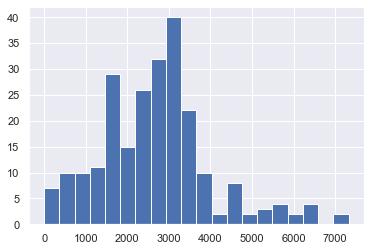

In [310]:
data4_mody['Country Code'].value_counts().hist(bins = 20)

In [423]:
data4_mody['Series Code'].value_counts()

SH.DYN.MORT                 9226
SE.PRM.DURS                 8771
SE.PRM.AGES                 8771
SE.SEC.DURS                 8619
SE.SEC.AGES                 8581
                            ... 
UIS.LP.Ag65.F                  1
SABER.STD.ASS.GOAL3.LVL2       1
SABER.EMIS.GOAL2.LVL4          1
UIS.AFR.NTP.3.PU.M             1
NY.GDP.MKTP.PP.CD              1
Name: Series Code, Length: 1558, dtype: int64

<AxesSubplot:>

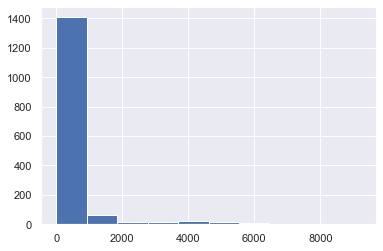

In [424]:
data4_mody['Series Code'].value_counts().hist()

# Fifth file

In [426]:
file5 = '/Users/Sheremet/Desktop/Alexandra Sheremet/Data Science/projet_2/projet/Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv'
pd.read_csv(file5).head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
data5 = pd.read_csv(file5)
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [428]:
#removing the last column
for i in ["Unit of measure","Notes from original source","Other web links", "Related indicators", "License Type", "Unnamed: 20"]:
    data5 = data5.drop(i, axis = 1)

In [429]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 11  Source                               3665 n

In [430]:
data5['Series Code'].value_counts()

LO.EGRA.CWPM.ZERO.KII.2GRD    1
PRJ.ATT.2529.3.FE             1
LO.PASEC.MAT.2.FE             1
UIS.REPR.1.G6.M               1
LO.PASEC.MAT.6.L3             1
                             ..
HH.DHS.GAR.456.Q5             1
SP.POP.1317.TO.UN             1
LO.PASEC.REA.2.LTR.0T5        1
NY.GNP.PCAP.PP.CD             1
HH.DHS.NIR.1.Q2               1
Name: Series Code, Length: 3665, dtype: int64

<AxesSubplot:>

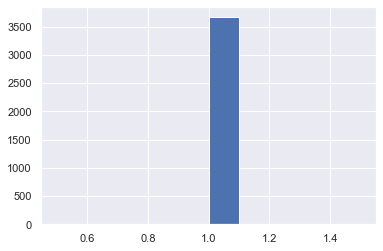

In [431]:
data5['Series Code'].value_counts().hist()

In [432]:
data5['Topic'].value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

<AxesSubplot:>

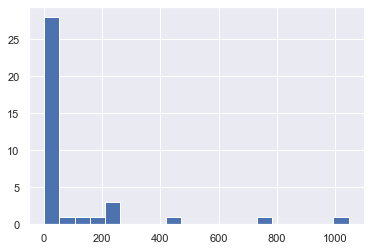

In [328]:
data5['Topic'].value_counts().hist(bins=20)

In [329]:
data5['Long definition'].value_counts()

Data Interpretation: 1=Latent; 2=Emerging; 3=Established; 4=Advanced. For additional information, visit the SABER: (website: http://saber.worldbank.org/index.cfm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [108]:
data6.describe()

,Position,Dept,Temps_secondes,Age
count,340.000000,340.000000,340.000000,336.000000
mean,177.061765,56.991176,780553.123529,42.145833
std,166.584054,25.059279,514.526264,13.963690
min,-100.000000,14.000000,779543.000000,18.000000
25%,85.750000,27.000000,780200.500000,34.000000
50%,170.500000,76.000000,780536.500000,41.500000
75%,255.250000,76.000000,780906.500000,49.250000
max,2640.000000,78.000000,781831.000000,174.000000


In [632]:
depenses = data[data['montant'] < 0]
dep = -depenses['montant'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

NameError: name 'data' is not defined

In [ ]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini